### Moquito West Nile Virus in Chicago: Classification Playground

### Import and clean dataframe

In [1]:
# Import dataset that we are going to work with

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_f41be5f4dda54d43b66fa3326ac26979 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='nWLZUA1vzK6PR8hzGean81mPU7T3JPrdSH_rbqHNvL2g',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_f41be5f4dda54d43b66fa3326ac26979.get_object(Bucket='decisiontree-donotdelete-pr-liiqvygcxjdm2j',Key='joined.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()


,DATE,SEASON YEAR,WEEK,TEST ID,BLOCK,TRAP,TRAP_TYPE,NUMBER OF MOSQUITOES,RESULT,SPECIES,...,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,PRCP_Avg,TAVG_Avg
0,5/29/2007,2007,21,20019,15XX W WEBSTER AVE,T045,GRAVID,2,negative,CULEX RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.152857,67.785714
1,5/29/2007,2007,21,20023,11XX W ROOSEVELT RD,T048,GRAVID,1,negative,CULEX PIPIENS/RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.152857,67.785714
2,5/29/2007,2007,21,20022,11XX W ROOSEVELT RD,T048,GRAVID,2,negative,CULEX RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.152857,67.785714
3,5/29/2007,2007,21,20047,17XX W 95TH ST,T094,GRAVID,3,negative,CULEX RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.152857,67.785714
4,5/29/2007,2007,21,20012,75XX N OAKLEY AVE,T148,GRAVID,1,negative,CULEX PIPIENS/RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.152857,67.785714


In [2]:
#Import essential tools for this machine learning project
 
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [3]:
# Clean the data set titles
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [4]:
data

,date,season_year,week,test_id,block,trap,trap_type,number_of_mosquitoes,result,species,...,wt14,wt15,wt16,wt17,wt18,wt19,wt21,wt22,prcp_avg,tavg_avg
0,5/29/2007,2007,21,20019,15XX W WEBSTER AVE,T045,GRAVID,2,negative,CULEX RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.152857,67.785714
1,5/29/2007,2007,21,20023,11XX W ROOSEVELT RD,T048,GRAVID,1,negative,CULEX PIPIENS/RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.152857,67.785714
2,5/29/2007,2007,21,20022,11XX W ROOSEVELT RD,T048,GRAVID,2,negative,CULEX RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.152857,67.785714
3,5/29/2007,2007,21,20047,17XX W 95TH ST,T094,GRAVID,3,negative,CULEX RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.152857,67.785714
4,5/29/2007,2007,21,20012,75XX N OAKLEY AVE,T148,GRAVID,1,negative,CULEX PIPIENS/RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.152857,67.785714
5,5/29/2007,2007,21,20025,11XX W CHICAGO AVE,T049,GRAVID,1,negative,CULEX RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.152857,67.785714
6,5/29/2007,2007,21,20007,62XX N MANDELL AVE,T007,CDC,1,negative,CULEX RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.152857,67.785714
7,5/29/2007,2007,21,20003,79XX W FOSTER AVE,T015,GRAVID,1,negative,CULEX PIPIENS/RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.152857,67.785714
8,5/29/2007,2007,21,20040,22XX W 113TH ST,T087,GRAVID,1,negative,CULEX RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.152857,67.785714
9,5/29/2007,2007,21,20020,25XX W GRAND AVE,T046,CDC,1,negative,CULEX RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.152857,67.785714


### Exploratory Data Analysis (EDA)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29489 entries, 0 to 29488
Data columns (total 48 columns):
date                          29489 non-null object
season_year                   29489 non-null int64
week                          29489 non-null int64
test_id                       29489 non-null int64
block                         29489 non-null object
trap                          29489 non-null object
trap_type                     29489 non-null object
number_of_mosquitoes          29489 non-null int64
result                        29489 non-null object
species                       29489 non-null object
latitude                      29489 non-null float64
longitude                     29489 non-null float64
location                      25071 non-null object
wards                         29489 non-null int64
census_tracts                 25071 non-null float64
zip_codes                     28372 non-null float64
community_areas               25071 non-null float64
histori

In [6]:
data.shape

(29489, 48)

In [7]:
data.isna().sum()

date                              0
season_year                       0
week                              0
test_id                           0
block                             0
trap                              0
trap_type                         0
number_of_mosquitoes              0
result                            0
species                           0
latitude                          0
longitude                         0
location                       4418
wards                             0
census_tracts                  4418
zip_codes                      1117
community_areas                4418
historical_wards_2003-2015     4418
station                           0
name                              0
prcp                              0
snow                              0
snwd                              0
tavg                              0
tmax                              0
tmin                              0
wesd                          19019
wt01                        

In [8]:
# Dataframe with only the year 2019

data_2019 = data.query('season_year =="2019"')
data_2019


,date,season_year,week,test_id,block,trap,trap_type,number_of_mosquitoes,result,species,...,wt14,wt15,wt16,wt17,wt18,wt19,wt21,wt22,prcp_avg,tavg_avg
27196,6/12/2019,2019,23,47762,51XX N MONT CLARE AVE,T223,GRAVID,10,negative,CULEX RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.107143,67.142857
27197,6/12/2019,2019,23,47749,41XX N OAK PARK AVE,T002,GRAVID,35,negative,CULEX RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.107143,67.142857
27198,6/12/2019,2019,23,47773,12XX W GREENLEAF AVE,T018,GRAVID,1,negative,CULEX TERRITANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.107143,67.142857
27199,6/12/2019,2019,23,47822,63XX W 64TH ST,T155,GRAVID,4,negative,CULEX PIPIENS/RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.107143,67.142857
27200,6/12/2019,2019,23,47818,52XX W 63RD ST,T065,GRAVID,7,negative,CULEX RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.107143,67.142857
27201,6/12/2019,2019,23,47752,70XX N MOSELLE AVE,T008,GRAVID,17,negative,CULEX PIPIENS/RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.107143,67.142857
27202,6/12/2019,2019,23,47787,1XX N CENTRAL PARK DR,T030,GRAVID,7,negative,CULEX PIPIENS/RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.107143,67.142857
27203,6/12/2019,2019,23,47792,17XX N PULASKI RD,T039,GRAVID,2,negative,CULEX RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.107143,67.142857
27204,6/12/2019,2019,23,47765,71XX N HARLEM AVE,T233,GRAVID,5,negative,CULEX PIPIENS/RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.107143,67.142857
27205,6/12/2019,2019,23,47759,36XX N PITTSBURGH AVE,T011,GRAVID,12,negative,CULEX RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.107143,67.142857


In [230]:
# Dataframe without the year 2019

df_model = data[data.season_year != 2019]

df_model

,date,season_year,week,test_id,block,trap,trap_type,number_of_mosquitoes,result,species,...,wt14,wt15,wt16,wt17,wt18,wt19,wt21,wt22,prcp_avg,tavg_avg
0,5/29/2007,2007,21,20019,15XX W WEBSTER AVE,T045,GRAVID,2,negative,CULEX RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.152857,67.785714
1,5/29/2007,2007,21,20023,11XX W ROOSEVELT RD,T048,GRAVID,1,negative,CULEX PIPIENS/RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.152857,67.785714
2,5/29/2007,2007,21,20022,11XX W ROOSEVELT RD,T048,GRAVID,2,negative,CULEX RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.152857,67.785714
3,5/29/2007,2007,21,20047,17XX W 95TH ST,T094,GRAVID,3,negative,CULEX RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.152857,67.785714
4,5/29/2007,2007,21,20012,75XX N OAKLEY AVE,T148,GRAVID,1,negative,CULEX PIPIENS/RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.152857,67.785714
5,5/29/2007,2007,21,20025,11XX W CHICAGO AVE,T049,GRAVID,1,negative,CULEX RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.152857,67.785714
6,5/29/2007,2007,21,20007,62XX N MANDELL AVE,T007,CDC,1,negative,CULEX RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.152857,67.785714
7,5/29/2007,2007,21,20003,79XX W FOSTER AVE,T015,GRAVID,1,negative,CULEX PIPIENS/RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.152857,67.785714
8,5/29/2007,2007,21,20040,22XX W 113TH ST,T087,GRAVID,1,negative,CULEX RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.152857,67.785714
9,5/29/2007,2007,21,20020,25XX W GRAND AVE,T046,CDC,1,negative,CULEX RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.152857,67.785714


In [231]:
correlation = df_model.loc[:, ['number_of_mosquitoes', 'prcp_avg', 'tavg_avg']] 

In [11]:
correlation

,number_of_mosquitoes,prcp_avg,tavg_avg
0,2,0.152857,67.785714
1,1,0.152857,67.785714
2,2,0.152857,67.785714
3,3,0.152857,67.785714
4,1,0.152857,67.785714
5,1,0.152857,67.785714
6,1,0.152857,67.785714
7,1,0.152857,67.785714
8,1,0.152857,67.785714
9,1,0.152857,67.785714


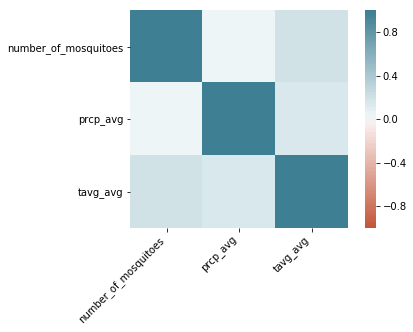

In [12]:
import seaborn as sns

corr = correlation.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

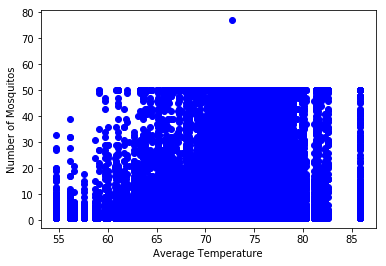

In [13]:
plt.scatter(correlation.tavg_avg, correlation.number_of_mosquitoes,  color='blue')
plt.xlabel("Average Temperature")
plt.ylabel("Number of Mosquitos")
plt.show()

In [14]:
df = df_model.loc[:, ['result', 'prcp_avg', 'tavg_avg', 'species']]

In [15]:
df.shape

(27196, 4)

In [16]:
df.species.unique()

array(['CULEX RESTUANS', 'CULEX PIPIENS/RESTUANS', 'CULEX PIPIENS',
       'CULEX SALINARIUS', 'CULEX TERRITANS', 'CULEX TARSALIS',
       'UNSPECIFIED CULEX', 'CULEX ERRATICUS'], dtype=object)

In [17]:
df['result'] = df['result'].astype(str)

### Preprocess Data

In [ ]:
# Split the data into features and target variables 
# Use one-hot encoding for mosquito species

In [18]:
Feature = df[['prcp_avg', 'tavg_avg', 'species']]
Feature = pd.concat([Feature,pd.get_dummies(df['species'])], axis=1)
Feature.drop(['species'], axis = 1,inplace=True)
Feature.drop(['UNSPECIFIED CULEX'], axis = 1,inplace=True)
Feature.drop(['CULEX ERRATICUS'], axis = 1, inplace=True)
Feature.head()

,prcp_avg,tavg_avg,CULEX PIPIENS,CULEX PIPIENS/RESTUANS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TARSALIS,CULEX TERRITANS
0,0.152857,67.785714,0,0,1,0,0,0
1,0.152857,67.785714,0,1,0,0,0,0
2,0.152857,67.785714,0,0,1,0,0,0
3,0.152857,67.785714,0,0,1,0,0,0
4,0.152857,67.785714,0,1,0,0,0,0


In [19]:
X = Feature 
X

,prcp_avg,tavg_avg,CULEX PIPIENS,CULEX PIPIENS/RESTUANS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TARSALIS,CULEX TERRITANS
0,0.152857,67.785714,0,0,1,0,0,0
1,0.152857,67.785714,0,1,0,0,0,0
2,0.152857,67.785714,0,0,1,0,0,0
3,0.152857,67.785714,0,0,1,0,0,0
4,0.152857,67.785714,0,1,0,0,0,0
5,0.152857,67.785714,0,0,1,0,0,0
6,0.152857,67.785714,0,0,1,0,0,0
7,0.152857,67.785714,0,1,0,0,0,0
8,0.152857,67.785714,0,0,1,0,0,0
9,0.152857,67.785714,0,0,1,0,0,0


In [20]:
y = df['result'].values
y[0:5]

array(['negative', 'negative', 'negative', 'negative', 'negative'],
      dtype=object)

In [145]:
unique_elements, counts_elements = np.unique(y, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[['negative' 'positive']
 [24862 2334]]


In [23]:
# Normalize Data

In [24]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.04666825, -0.82920301, -0.46505814, -0.90109904,  1.41320015,
        -0.08842601, -0.0383793 , -0.17532017],
       [-0.04666825, -0.82920301, -0.46505814,  1.10975593, -0.70761385,
        -0.08842601, -0.0383793 , -0.17532017],
       [-0.04666825, -0.82920301, -0.46505814, -0.90109904,  1.41320015,
        -0.08842601, -0.0383793 , -0.17532017],
       [-0.04666825, -0.82920301, -0.46505814, -0.90109904,  1.41320015,
        -0.08842601, -0.0383793 , -0.17532017],
       [-0.04666825, -0.82920301, -0.46505814,  1.10975593, -0.70761385,
        -0.08842601, -0.0383793 , -0.17532017]])

### Classification Algorithms

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, ,y test_size = 0.2, random_state = 42)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (21756, 8) (21756,)
Test set: (5440, 8) (5440,)


#### K Nearest Nighbors (KNN)

In [47]:
from sklearn import neighbors 

In [48]:
# Start with a cluster of 6 as k (used k with highest accuracy >1 shown below)

k = 4
# Train Model and Predict
neigh = neighbors.KNeighborsClassifier(n_neighbors = k).fit(X_resampled, y_resampled)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [49]:
yhat_neigh = neigh.predict(X_test)
yhat_neigh 

array(['negative', 'negative', 'negative', ..., 'negative', 'negative',
       'negative'], dtype=object)

In [50]:
# Find accuracy of the kNeighborsClassifier with each value of k
from sklearn import metrics

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = neighbors.KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat_neigh=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat_neigh)

    
    std_acc[n-1]=np.std(yhat_neigh==y_test)/np.sqrt(yhat_neigh.shape[0])

mean_acc

array([0.87904412, 0.91360294, 0.91102941, 0.91378676, 0.91286765,
       0.91580882, 0.91617647, 0.92224265, 0.92040441])

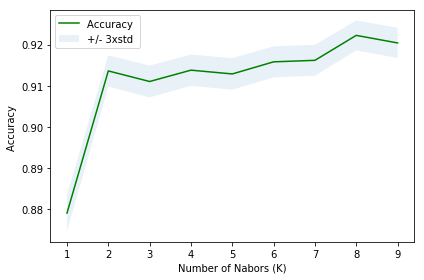

In [51]:
# Graph Accuracy versus Number of Nabors (K)
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

#### Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier


In [54]:
virusTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
virusTree # it shows the default parameters


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [55]:
# Fit the data with training feature matrix X_train and training response vector y_train

virusTree = virusTree.fit(X_train,y_train)

In [56]:
# Make predictions on the testing dataset and store it into a variable called PredTree

predTree = virusTree.predict(X_test)
predTree

array(['negative', 'negative', 'negative', ..., 'negative', 'negative',
       'negative'], dtype=object)

In [57]:
# Print out head of virusTree and y_test to visually compare the prediction to the actual values
print(predTree [0:5])
print(y_test [0:5])

['negative' 'negative' 'negative' 'negative' 'negative']
['negative' 'negative' 'negative' 'negative' 'negative']


In [58]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    pydotplus-2.0.2            |     pyhd1c1de3_3          23 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2019.9.11  |       hecc5488_0         144 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following NEW packages will be INSTALLED:

    pydotplus:       2.0.2-pyhd1c1de3_3 conda-forge

The following packages will be UPDATED:

    certifi:         2019.9.11-py36_0               --> 2019.9.11-py36_0     conda-forge

The following packages will be DOWNGRADED

In [59]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


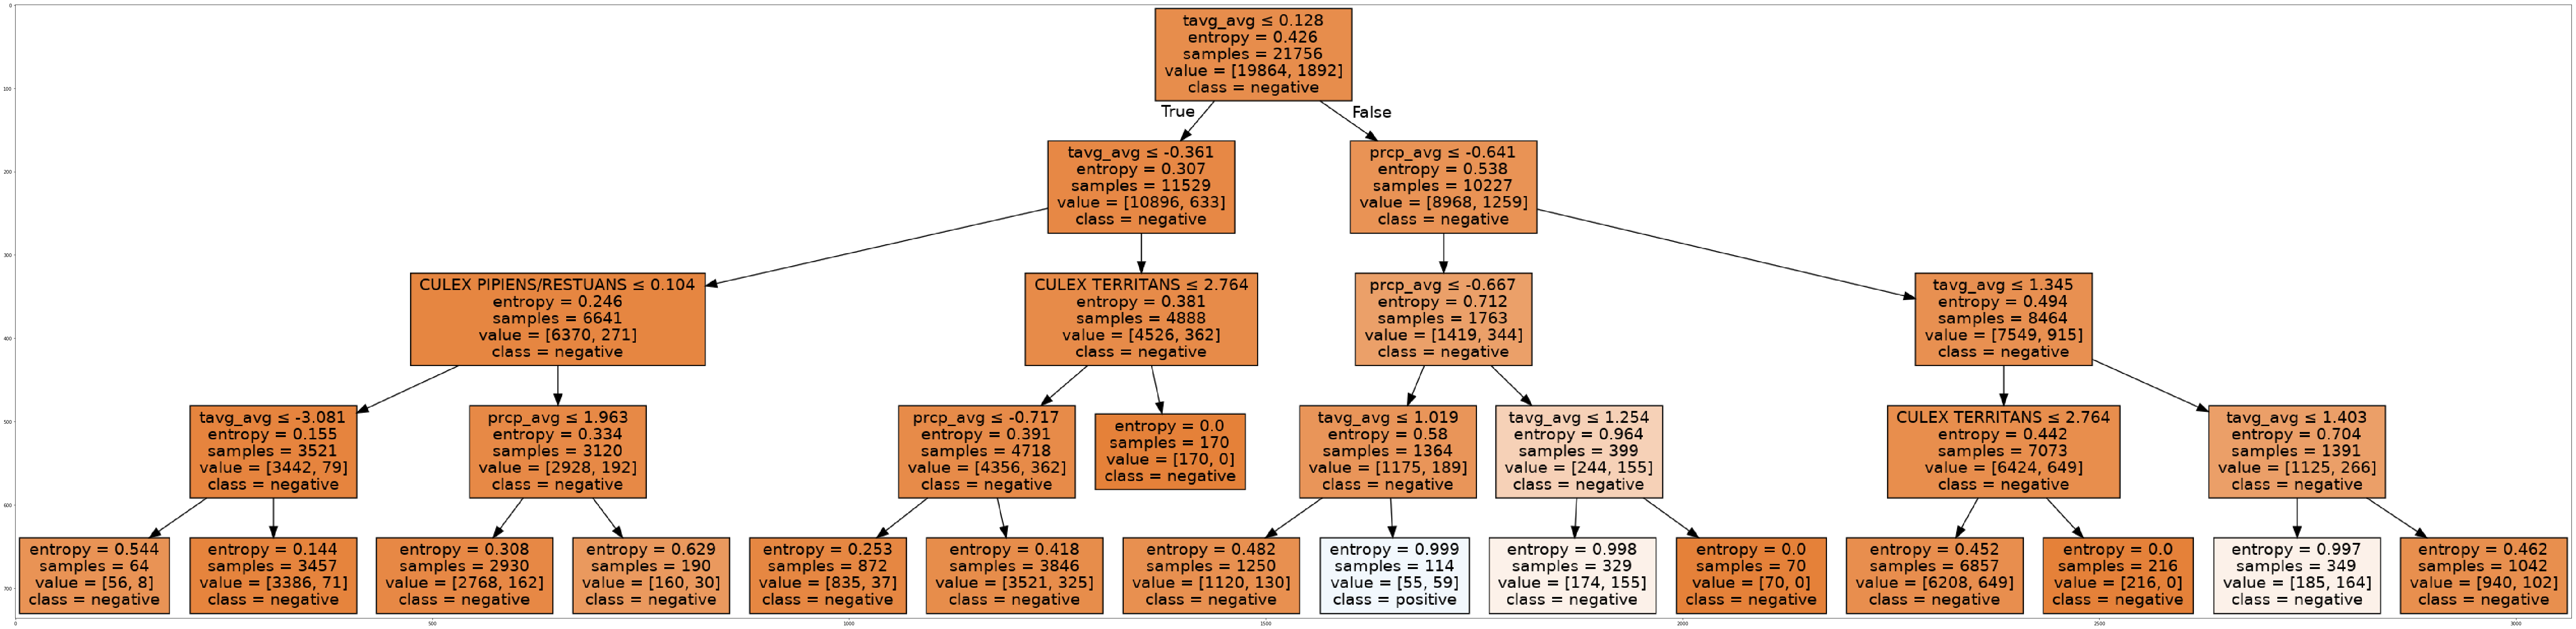

In [60]:
# Set up decision tree visual 
dot_data = StringIO()
filename = "virusTree.png"
featureNames = Feature.columns[0:8]
targetNames = np.unique(y)
out=tree.export_graphviz(virusTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

#### Support Vector Machine

In [153]:
# Fit the training data for SVM 
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [154]:
# After being fitted, the model can then be used to predict new values:
yhat_SVM = clf.predict(X_test)
yhat_SVM [0:5]

array(['negative', 'negative', 'negative', 'negative', 'negative'],
      dtype=object)

#### Logistic Regression

In [156]:
# Fit the training data for logistic regression 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [157]:
# Now we can predict using our test set:
yhat_LR = LR.predict(X_test)
yhat_LR [0:5]

array(['negative', 'negative', 'negative', 'negative', 'negative'],
      dtype=object)

In [158]:
unique_elements, counts_elements = np.unique(yhat_LR, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[['negative']
 [5440]]


In [159]:
# __predict_proba__  returns estimates for all classes, ordered by the label of classes
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.90875143, 0.09124857],
       [0.98912605, 0.01087395],
       [0.86614329, 0.13385671],
       ...,
       [0.90322126, 0.09677874],
       [0.92089181, 0.07910819],
       [0.9715036 , 0.0284964 ]])

### Model Evaluation using Test Set

In [161]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [162]:
# Jaccard Index for KNN
knn_jacc = jaccard_similarity_score(y_test, yhat_neigh)
knn_jacc

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.9204044117647059

In [163]:
# Jaccard Index for Decision Tree
predTree_jacc = jaccard_similarity_score(y_test, predTree)
predTree_jacc

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.9200367647058824

In [164]:
# Jaccard Index for XGB

XGB_jacc = jaccard_similarity_score(y_test, pred_xgb)
XGB_jacc

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.7141544117647058

In [165]:
# Jaccard Index for SVM
SVM_jacc = jaccard_similarity_score(y_test, yhat_SVM)
SVM_jacc

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.91875

In [166]:
# Jaccard Index for Logistic Regression
LR_jacc = jaccard_similarity_score(y_test, yhat_LR)
LR_jacc

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.91875

In [167]:
# F1-Score for KNN
knn_f1 = f1_score(y_test, yhat_neigh, average='weighted') 
knn_f1

0.8980806993434113

In [168]:
# F1-Score for Decision Tree
predTree_f1 = f1_score(y_test, predTree, average='weighted')
predTree_f1

0.8886793189628243

In [169]:
XGB_f1 = f1_score(y_test, pred_xgb, average='weighted')
predTree_f1

0.8886793189628243

In [170]:
# F1-Score for SVM
SVM_f1 = f1_score(y_test, yhat_SVM, average='weighted') 
SVM_f1 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.8798452768729641

In [171]:
# F1-Score for LR
LR_f1 = f1_score(y_test, yhat_LR, average='weighted')
LR_f1

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.8798452768729641

In [172]:
# Log Loss for LR
LR_log = log_loss(y_test, yhat_prob)
LR_log

0.2695236834283571

In [173]:
# Put test results together in a list
report_list = [[knn_jacc, knn_f1], [predTree_jacc, predTree_f1], 
       [SVM_jacc, SVM_f1], [LR_jacc, LR_f1, LR_log]]
report_list

[[0.9204044117647059, 0.8980806993434113],
 [0.9200367647058824, 0.8886793189628243],
 [0.91875, 0.8798452768729641],
 [0.91875, 0.8798452768729641, 0.2695236834283571]]

In [174]:
# Convert list to a data frame for final output
report_df = pd.DataFrame(report_list, columns = ['Jaccard', 'F1-score', 'LogLoss'], index=['KNN', 'Decision Tree', 'SVM', 'LogisticRegression'])
report_df

,Jaccard,F1-score,LogLoss
KNN,0.920404,0.898081,NaN
Decision Tree,0.920037,0.888679,NaN
SVM,0.918750,0.879845,NaN
LogisticRegression,0.918750,0.879845,0.269524


### Now, model using 2019 data

In [176]:
df_2019 = data_2019.loc[:, ['result', 'prcp_avg', 'tavg_avg', 'species']]
df_2019

,result,prcp_avg,tavg_avg,species
27196,negative,0.107143,67.142857,CULEX RESTUANS
27197,negative,0.107143,67.142857,CULEX RESTUANS
27198,negative,0.107143,67.142857,CULEX TERRITANS
27199,negative,0.107143,67.142857,CULEX PIPIENS/RESTUANS
27200,negative,0.107143,67.142857,CULEX RESTUANS
27201,negative,0.107143,67.142857,CULEX PIPIENS/RESTUANS
27202,negative,0.107143,67.142857,CULEX PIPIENS/RESTUANS
27203,negative,0.107143,67.142857,CULEX RESTUANS
27204,negative,0.107143,67.142857,CULEX PIPIENS/RESTUANS
27205,negative,0.107143,67.142857,CULEX RESTUANS


In [179]:
df_2019['result'] = df_2019['result'].astype(str)

In [180]:
Feature_2019 = df_2019[['prcp_avg', 'tavg_avg', 'species']]
Feature_2019 = pd.concat([Feature_2019,pd.get_dummies(df_2019['species'])], axis=1)
Feature_2019.drop(['species'], axis = 1,inplace=True)


In [181]:
X_2019 = Feature_2019 
X_2019[0:5]

,prcp_avg,tavg_avg,CULEX PIPIENS,CULEX PIPIENS/RESTUANS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TARSALIS,CULEX TERRITANS
27196,0.107143,67.142857,0,0,1,0,0,0
27197,0.107143,67.142857,0,0,1,0,0,0
27198,0.107143,67.142857,0,0,0,0,0,1
27199,0.107143,67.142857,0,1,0,0,0,0
27200,0.107143,67.142857,0,0,1,0,0,0


In [187]:
y_2019 = df_2019['result'].values
y[0:5]

array(['negative', 'negative', 'negative', 'negative', 'negative'],
      dtype=object)

In [189]:
X_2019= preprocessing.StandardScaler().fit(X_2019).transform(X_2019)
X_2019[0:5]

array([[-0.25890094, -1.04417102, -0.10065862, -1.01715542,  1.14826109,
        -0.0553364 , -0.05917004, -0.21354071],
       [-0.25890094, -1.04417102, -0.10065862, -1.01715542,  1.14826109,
        -0.0553364 , -0.05917004, -0.21354071],
       [-0.25890094, -1.04417102, -0.10065862, -1.01715542, -0.87088207,
        -0.0553364 , -0.05917004,  4.68294779],
       [-0.25890094, -1.04417102, -0.10065862,  0.98313393, -0.87088207,
        -0.0553364 , -0.05917004, -0.21354071],
       [-0.25890094, -1.04417102, -0.10065862, -1.01715542,  1.14826109,
        -0.0553364 , -0.05917004, -0.21354071]])

In [190]:
X_2019.shape

(2293, 8)

In [191]:
# Predict 2019 using K-Nearest Neighbors

In [192]:
neigh2019 = neigh.predict(X_2019)


In [193]:
neigh2019

array(['negative', 'negative', 'negative', ..., 'negative', 'positive',
       'positive'], dtype=object)

In [194]:
unique_elements, counts_elements = np.unique(neigh2019, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[['negative' 'positive']
 [1884 409]]


In [195]:
# Predict 2019 using Decision Tree
predTree2019 = virusTree.predict(X_2019)
predTree2019

array(['negative', 'negative', 'negative', ..., 'negative', 'negative',
       'negative'], dtype=object)

In [196]:
unique_elements, counts_elements = np.unique(predTree2019, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[['negative' 'positive']
 [2064 229]]


In [197]:
# Predict 2019 using Support Vector Machine
SVM2019 = clf.predict(X_2019)
SVM2019

array(['negative', 'negative', 'negative', ..., 'negative', 'negative',
       'negative'], dtype=object)

In [198]:
unique_elements, counts_elements = np.unique(SVM2019, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[['negative']
 [2293]]


In [199]:
# Predict 2019 using Logistic Regression

In [200]:
LR2019 = LR.predict(X_2019)
LR2019

array(['negative', 'negative', 'negative', ..., 'negative', 'negative',
       'negative'], dtype=object)

In [201]:
unique_elements, counts_elements = np.unique(LR2019, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[['negative']
 [2293]]


In [202]:
unique_elements, counts_elements = np.unique(neigh2019, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[['negative' 'positive']
 [1884 409]]


In [203]:
# __predict_proba__  returns estimates for all classes, ordered by the label of classes
LR2019prob = LR.predict_proba(X_2019)
LR2019prob

array([[0.94866124, 0.05133876],
       [0.94866124, 0.05133876],
       [0.98451615, 0.01548385],
       ...,
       [0.93953953, 0.06046047],
       [0.91033993, 0.08966007],
       [0.91033993, 0.08966007]])

In [204]:
# Model Evaluation using 2019 Set

In [205]:
# Jaccard Index for KNN
knn_jacc = jaccard_similarity_score(y_2019, neigh2019)
knn_jacc

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.7679895333624073

In [206]:
# Jaccard Index for Decision Tree
predTree_jacc = jaccard_similarity_score(y_2019, predTree2019)
predTree_jacc

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.8412559965111208

In [207]:
# Jaccard Index for SVM
SVM_jacc = jaccard_similarity_score(y_2019, SVM2019)
SVM_jacc

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.9341474051460968

In [208]:
# Jaccard Index for Logistic Regression
LR_jacc = jaccard_similarity_score(y_2019, LR2019)
LR_jacc

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.9341474051460968

In [209]:
# F1-Score for KNN
knn_f1 = f1_score(y_2019, neigh2019, average='weighted') 
knn_f1

0.8140007851278075

In [210]:
# F1-Score for Decision Tree
predTree_f1 = f1_score(y_2019, predTree2019, average='weighted')
predTree_f1

0.8560761955604673

In [211]:
# F1-Score for SVM
SVM_f1 = f1_score(y_2019, SVM2019, average='weighted') 
SVM_f1 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.9023421609122612

In [212]:
# F1-Score for LR
LR_f1 = f1_score(y_2019, LR2019, average='weighted')
LR_f1

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.9023421609122612

In [213]:
# Put test results together in a list
report_list = [[knn_jacc, knn_f1], [predTree_jacc, predTree_f1], 
       [SVM_jacc, SVM_f1], [LR_jacc, LR_f1]]
report_list

[[0.7679895333624073, 0.8140007851278075],
 [0.8412559965111208, 0.8560761955604673],
 [0.9341474051460968, 0.9023421609122612],
 [0.9341474051460968, 0.9023421609122612]]

In [214]:
# Convert list to a data frame for final output
report_df = pd.DataFrame(report_list, columns = ['Jaccard', 'F1-score'], index=['KNN', 'Decision Tree', 'SVM', 'LogisticRegression'])
report_df

,Jaccard,F1-score
KNN,0.767990,0.814001
Decision Tree,0.841256,0.856076
SVM,0.934147,0.902342
LogisticRegression,0.934147,0.902342


### Confusion Matrix for our Classifier of Choice: Decision Tree

In [215]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_2019, predTree2019)
cm

array([[1921,  221],
       [ 143,    8]])

In [216]:
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['negative','positive'], 
                     columns = ['negative', 'positive'])
cm_df

,negative,positive
negative,1921,221
positive,143,8


In [217]:
!conda install -c districtdatalabs yellowbrick
#!conda install -c conda-forge districtdatalabs yellowbrick -y

Solving environment: done

# All requested packages already installed.



/opt/conda/envs/Python36/lib/python3.6/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


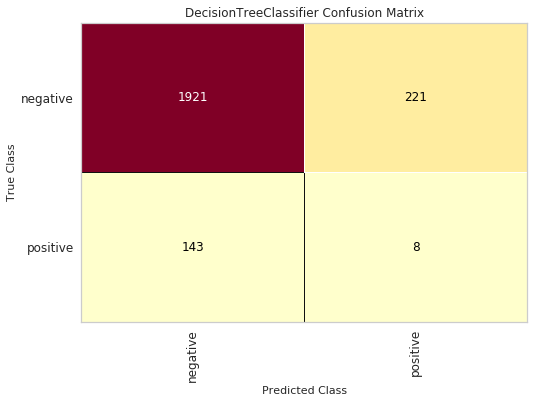

In [218]:
from yellowbrick.classifier import ConfusionMatrix

virus_cm = ConfusionMatrix(virusTree, classes=["negative", "positive"], label_encoder={0:"negative", 1:"positive"})

virus_cm.score(X_2019, y_2019)
virus_cm.poof()


In [134]:
predTree2019

array(['negative', 'negative', 'negative', ..., 'negative', 'negative',
       'negative'], dtype=object)

## Include Prediction to the Original Dataset for Mapping on Tableau! 

In [136]:
data_2019

,date,season_year,week,test_id,block,trap,trap_type,number_of_mosquitoes,result,species,...,wt14,wt15,wt16,wt17,wt18,wt19,wt21,wt22,prcp_avg,tavg_avg
27196,6/12/2019,2019,23,47762,51XX N MONT CLARE AVE,T223,GRAVID,10,negative,CULEX RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.107143,67.142857
27197,6/12/2019,2019,23,47749,41XX N OAK PARK AVE,T002,GRAVID,35,negative,CULEX RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.107143,67.142857
27198,6/12/2019,2019,23,47773,12XX W GREENLEAF AVE,T018,GRAVID,1,negative,CULEX TERRITANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.107143,67.142857
27199,6/12/2019,2019,23,47822,63XX W 64TH ST,T155,GRAVID,4,negative,CULEX PIPIENS/RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.107143,67.142857
27200,6/12/2019,2019,23,47818,52XX W 63RD ST,T065,GRAVID,7,negative,CULEX RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.107143,67.142857
27201,6/12/2019,2019,23,47752,70XX N MOSELLE AVE,T008,GRAVID,17,negative,CULEX PIPIENS/RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.107143,67.142857
27202,6/12/2019,2019,23,47787,1XX N CENTRAL PARK DR,T030,GRAVID,7,negative,CULEX PIPIENS/RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.107143,67.142857
27203,6/12/2019,2019,23,47792,17XX N PULASKI RD,T039,GRAVID,2,negative,CULEX RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.107143,67.142857
27204,6/12/2019,2019,23,47765,71XX N HARLEM AVE,T233,GRAVID,5,negative,CULEX PIPIENS/RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.107143,67.142857
27205,6/12/2019,2019,23,47759,36XX N PITTSBURGH AVE,T011,GRAVID,12,negative,CULEX RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.107143,67.142857


In [137]:
data_2019.shape

(2293, 48)

In [138]:
data_2019['predictions_tree'] = predTree2019
updated_df = data_2019
updated_df

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,date,season_year,week,test_id,block,trap,trap_type,number_of_mosquitoes,result,species,...,wt15,wt16,wt17,wt18,wt19,wt21,wt22,prcp_avg,tavg_avg,predictions_tree
27196,6/12/2019,2019,23,47762,51XX N MONT CLARE AVE,T223,GRAVID,10,negative,CULEX RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.107143,67.142857,negative
27197,6/12/2019,2019,23,47749,41XX N OAK PARK AVE,T002,GRAVID,35,negative,CULEX RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.107143,67.142857,negative
27198,6/12/2019,2019,23,47773,12XX W GREENLEAF AVE,T018,GRAVID,1,negative,CULEX TERRITANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.107143,67.142857,negative
27199,6/12/2019,2019,23,47822,63XX W 64TH ST,T155,GRAVID,4,negative,CULEX PIPIENS/RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.107143,67.142857,negative
27200,6/12/2019,2019,23,47818,52XX W 63RD ST,T065,GRAVID,7,negative,CULEX RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.107143,67.142857,negative
27201,6/12/2019,2019,23,47752,70XX N MOSELLE AVE,T008,GRAVID,17,negative,CULEX PIPIENS/RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.107143,67.142857,negative
27202,6/12/2019,2019,23,47787,1XX N CENTRAL PARK DR,T030,GRAVID,7,negative,CULEX PIPIENS/RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.107143,67.142857,negative
27203,6/12/2019,2019,23,47792,17XX N PULASKI RD,T039,GRAVID,2,negative,CULEX RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.107143,67.142857,negative
27204,6/12/2019,2019,23,47765,71XX N HARLEM AVE,T233,GRAVID,5,negative,CULEX PIPIENS/RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.107143,67.142857,negative
27205,6/12/2019,2019,23,47759,36XX N PITTSBURGH AVE,T011,GRAVID,12,negative,CULEX RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.107143,67.142857,negative


In [140]:
updated_df['predictions_neigh'] = neigh2019
updated_df

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,date,season_year,week,test_id,block,trap,trap_type,number_of_mosquitoes,result,species,...,wt16,wt17,wt18,wt19,wt21,wt22,prcp_avg,tavg_avg,predictions_tree,predictions_neigh
27196,6/12/2019,2019,23,47762,51XX N MONT CLARE AVE,T223,GRAVID,10,negative,CULEX RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,0.107143,67.142857,negative,negative
27197,6/12/2019,2019,23,47749,41XX N OAK PARK AVE,T002,GRAVID,35,negative,CULEX RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,0.107143,67.142857,negative,negative
27198,6/12/2019,2019,23,47773,12XX W GREENLEAF AVE,T018,GRAVID,1,negative,CULEX TERRITANS,...,NaN,NaN,NaN,NaN,NaN,NaN,0.107143,67.142857,negative,negative
27199,6/12/2019,2019,23,47822,63XX W 64TH ST,T155,GRAVID,4,negative,CULEX PIPIENS/RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,0.107143,67.142857,negative,negative
27200,6/12/2019,2019,23,47818,52XX W 63RD ST,T065,GRAVID,7,negative,CULEX RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,0.107143,67.142857,negative,negative
27201,6/12/2019,2019,23,47752,70XX N MOSELLE AVE,T008,GRAVID,17,negative,CULEX PIPIENS/RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,0.107143,67.142857,negative,negative
27202,6/12/2019,2019,23,47787,1XX N CENTRAL PARK DR,T030,GRAVID,7,negative,CULEX PIPIENS/RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,0.107143,67.142857,negative,negative
27203,6/12/2019,2019,23,47792,17XX N PULASKI RD,T039,GRAVID,2,negative,CULEX RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,0.107143,67.142857,negative,negative
27204,6/12/2019,2019,23,47765,71XX N HARLEM AVE,T233,GRAVID,5,negative,CULEX PIPIENS/RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,0.107143,67.142857,negative,negative
27205,6/12/2019,2019,23,47759,36XX N PITTSBURGH AVE,T011,GRAVID,12,negative,CULEX RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,0.107143,67.142857,negative,negative


In [141]:
#updated_df.to_excel(r'C:\Users\Mudit Mathur\Desktop\Mosquito-Capstone\predictions.xlsx', index=False)


### One last try: Use XGBoost for Imbalanced Data

In [222]:
# Imbalanced data set with 24862 negative values and 2334 positive values
xgb_virus = xgb.XGBClassifier(scale_pos_weight = 10)
xgb_virus

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
              seed=None, silent=True, subsample=1)

In [223]:
# Fit the data with training feature matrix X_train and training response vector y_train


xgb_virus = xgb_virus.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_test, y_test)])

[0]	validation_0-error:0.391912
Will train until validation_0-error hasn't improved in 10 rounds.
[1]	validation_0-error:0.381618
[2]	validation_0-error:0.381618
[3]	validation_0-error:0.381801
[4]	validation_0-error:0.381618
[5]	validation_0-error:0.390441
[6]	validation_0-error:0.390441
[7]	validation_0-error:0.378676
[8]	validation_0-error:0.381618
[9]	validation_0-error:0.378676
[10]	validation_0-error:0.36875
[11]	validation_0-error:0.36875
[12]	validation_0-error:0.376287
[13]	validation_0-error:0.357353
[14]	validation_0-error:0.356618
[15]	validation_0-error:0.285846
[16]	validation_0-error:0.318566
[17]	validation_0-error:0.291728
[18]	validation_0-error:0.28989
[19]	validation_0-error:0.319118
[20]	validation_0-error:0.297978
[21]	validation_0-error:0.298897
[22]	validation_0-error:0.296875
[23]	validation_0-error:0.319118
[24]	validation_0-error:0.304228
[25]	validation_0-error:0.301654
Stopping. Best iteration:
[15]	validation_0-error:0.285846



In [224]:
# Make predictions on the testing dataset and store it into a variable called pred_xgb
pred_xgb = xgb_virus.predict(X_test)
pred_xgb

array(['negative', 'negative', 'positive', ..., 'negative', 'negative',
       'negative'], dtype=object)

In [227]:
unique_elements, counts_elements = np.unique(pred_xgb, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[['negative' 'positive']
 [3833 1607]]


In [232]:
xgb_jacc = jaccard_similarity_score(y_2019, predTree2019)
xgb_jacc

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.8412559965111208

/opt/conda/envs/Python36/lib/python3.6/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


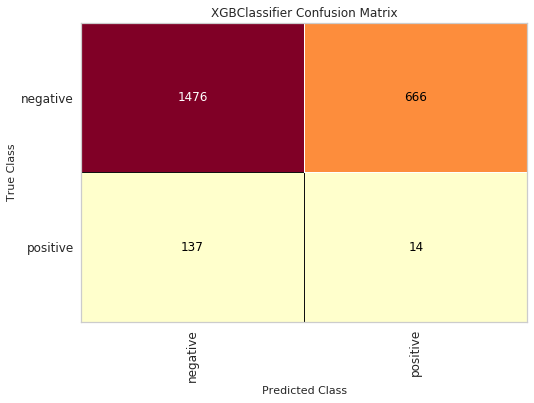

In [233]:
xgb_cm = ConfusionMatrix(xgb_virus, classes=["negative", "positive"], label_encoder={0:"negative", 1:"positive"})

xgb_cm.score(X_2019, y_2019)
xgb_cm.poof()
